In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from functions import *
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster, leaders, centroid
from scipy.spatial.distance import pdist
from scipy import stats, cluster


In [2]:
address_pop = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P5/etude de marché/pob.csv'
population = pd.DataFrame(pd.read_csv(address_pop))
population.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,53687.121,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,2903.790,X,Sources internationales sûres,NaN


In [3]:
pop_df = population.pivot(index=['Zone'],columns='Année', values='Valeur')
pop_df = pop_df.rename_axis(None, axis=1)
pop_df.reset_index(inplace=True)
pop_df = pop_df.rename(columns={'Zone':'pays', 2013:'pop_2013', 2018:'pop_2018'})
pop_df['pop_var'] = pop_df['pop_2018']/pop_df['pop_2013'] - 1
pop_df.head()

,pays,pop_2013,pop_2018,pop_var
0,Afghanistan,32269.589,37171.921,0.151918
1,Afrique du Sud,53687.121,57792.518,0.076469
2,Albanie,2903.790,2882.740,-0.007249
3,Algérie,38140.133,42228.408,0.107191
4,Allemagne,81174.367,83124.418,0.024023


In [4]:
#rechercher des valeurs nulles (manquantes) dans le dataframe


pays        0
pop_2013    0
pop_2018    0
pop_var     0
dtype: int64

In [5]:
address_disp_alim = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P5/etude de marché/disp_alim (kcal, prot).csv'
disp_alim = pd.DataFrame(pd.read_csv(address_disp_alim))
disp_alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2018,2018,Kcal/personne/jour,2040.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2018,2018,g/personne/jour,55.52,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2018,2018,Kcal/personne/jour,2899.00,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2018,2018,g/personne/jour,84.37,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),3,Albanie,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2018,2018,Kcal/personne/jour,3360.00,Fc,Donnée calculée


In [6]:
disp_alim_df = disp_alim.pivot(index=['Zone'],columns='Élément', values='Valeur')
disp_alim_df = disp_alim_df.rename_axis(None, axis=1)
disp_alim_df.reset_index(inplace=True)
disp_alim_df = disp_alim_df.rename(columns={'Zone':'pays', 
                                'Disponibilité alimentaire (Kcal/personne/jour)':'disp_alim(Kcal/personne/jour)', 
                                'Disponibilité de protéines en quantité (g/personne/jour)':'disp_prot(g/personne/jour)'})
disp_alim_df['disp_alim(Kcal/personne)'] = disp_alim_df['disp_alim(Kcal/personne/jour)']*365
disp_alim_df['disp_prot(g/personne)'] = disp_alim_df['disp_prot(g/personne/jour)']*365
disp_alim_df.head()

,pays,disp_alim(Kcal/personne/jour),disp_prot(g/personne/jour),disp_alim(Kcal/personne),disp_prot(g/personne)
0,Afghanistan,2040.0,55.52,744600.0,20264.80
1,Afrique du Sud,2899.0,84.37,1058135.0,30795.05
2,Albanie,3360.0,115.74,1226400.0,42245.10
3,Algérie,3322.0,91.83,1212530.0,33517.95
4,Allemagne,3554.0,105.40,1297210.0,38471.00


In [7]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
disp_alim_df.isnull().sum()

pays                             0
disp_alim(Kcal/personne/jour)    0
disp_prot(g/personne/jour)       0
disp_alim(Kcal/personne)         0
disp_prot(g/personne)            0
dtype: int64

In [8]:
address_prot_anim = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P5/etude de marché/disp_alim_anim.csv'
prot_anim = pd.DataFrame(pd.read_csv(address_prot_anim))
prot_anim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,10.79,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),202,Afrique du Sud,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,36.03,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),3,Albanie,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,61.75,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),4,Algérie,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,24.73,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),79,Allemagne,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,64.03,Fc,Donnée calculée


In [9]:
prot_anim_df = prot_anim.pivot(index=['Zone'],columns='Élément', values='Valeur')
prot_anim_df = prot_anim_df.rename_axis(None, axis=1)
prot_anim_df.reset_index(inplace=True)
prot_anim_df = prot_anim_df.rename(columns={'Zone':'pays',
                                            'Disponibilité de protéines en quantité (g/personne/jour)':'disp_prot_anim(g/personne/jour)'})
prot_anim_df['disp_prot_anim(g/personne)'] = prot_anim_df['disp_prot_anim(g/personne/jour)']*365
prot_anim_df.head()
prot_anim_df.head()

,pays,disp_prot_anim(g/personne/jour),disp_prot_anim(g/personne)
0,Afghanistan,10.79,3938.35
1,Afrique du Sud,36.03,13150.95
2,Albanie,61.75,22538.75
3,Algérie,24.73,9026.45
4,Allemagne,64.03,23370.95


In [10]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
prot_anim_df.isnull().sum()

pays                               0
disp_prot_anim(g/personne/jour)    0
disp_prot_anim(g/personne)         0
dtype: int64

In [11]:
address_impo = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P5/etude de marché/prod_impo_anim.csv'
prod_impo = pd.DataFrame(pd.read_csv(address_impo))
prod_impo.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2731,Viande de Bovins,2018,2018,Milliers de tonnes,130.0,Im,Données de la FAO basées sur une méthodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2731,Viande de Bovins,2018,2018,Milliers de tonnes,5.0,Im,Données de la FAO basées sur une méthodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2732,Viande d'Ovins/Caprins,2018,2018,Milliers de tonnes,161.0,Im,Données de la FAO basées sur une méthodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2732,Viande d'Ovins/Caprins,2018,2018,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2733,Viande de porcins,2018,2018,Milliers de tonnes,0.0,Im,Données de la FAO basées sur une méthodologie ...


In [12]:
prod_impo_df = pd.pivot_table(prod_impo, index=['Zone'], columns='Élément', values='Valeur', aggfunc = 'sum')
prod_impo_df = prod_impo_df.rename_axis(None, axis=1)
prod_impo_df.reset_index(inplace=True)
prod_impo_df = prod_impo_df.rename(columns={'Zone':'pays',
                                            'Importations - Quantité':'impo_anim_tons', 
                                            'Production': 'prod_anim_tons'})
prod_impo_df['ratio_imp_prod'] = prod_impo_df['impo_anim_tons']/prod_impo_df['prod_anim_tons']
prod_impo_df.head()

,pays,impo_anim_tons,prod_anim_tons,ratio_imp_prod
0,Afghanistan,134.00,2596.00,0.051618
1,Afrique du Sud,1099.84,8382.05,0.131214
2,Albanie,70.40,1328.70,0.052984
3,Algérie,440.15,4367.83,0.100771
4,Allemagne,14124.21,45071.41,0.313374


In [13]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
prod_impo_df.isnull().sum()

pays              0
impo_anim_tons    0
prod_anim_tons    0
ratio_imp_prod    0
dtype: int64

In [14]:
address_pib = 'C:/Users/Oscar Gomez/Desktop/Data Analyst/P5/etude de marché/pib_p_c.csv'
pib = pd.DataFrame(pd.read_csv(address_pib))
pib.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,483.885875,X,Sources internationales sûres,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,6369.231608,X,Sources internationales sûres,NaN
2,MK,Indicateurs macro,3,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,5254.384798,X,Sources internationales sûres,NaN
3,MK,Indicateurs macro,4,Algérie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,4153.957220,X,Sources internationales sûres,NaN
4,MK,Indicateurs macro,79,Allemagne,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2018,2018,US$,47684.755233,X,Sources internationales sûres,NaN


In [15]:
pib_df = pib.pivot(index=['Zone'],columns='Élément', values='Valeur')
pib_df = pib_df.rename_axis(None, axis=1)
pib_df.reset_index(inplace=True)
pib_df = pib_df.rename(columns={'Zone':'pays', 'Valeur US $ par habitant':'pib_capita'})
pib_df.head()

,pays,pib_capita
0,Afghanistan,483.885875
1,Afrique du Sud,6369.231608
2,Albanie,5254.384798
3,Algérie,4153.957220
4,Allemagne,47684.755233


In [16]:
#rechercher des valeurs nulles (manquantes) dans le dataframe
pib_df.isnull().sum()

pays          0
pib_capita    0
dtype: int64

In [17]:
df1 = pd.merge(pop_df, disp_alim_df, left_on='pays', right_on='pays')
df2 = pd.merge(df1, prot_anim_df, left_on='pays', right_on='pays')
df3 = pd.merge(df2, prod_impo_df, left_on='pays', right_on='pays')
data = pd.merge(df3, pib_df, left_on='pays', right_on='pays')
data.head()

,pays,pop_2013,pop_2018,pop_var,disp_alim(Kcal/personne/jour),disp_prot(g/personne/jour),disp_alim(Kcal/personne),disp_prot(g/personne),disp_prot_anim(g/personne/jour),disp_prot_anim(g/personne),impo_anim_tons,prod_anim_tons,ratio_imp_prod,pib_capita
0,Afghanistan,32269.589,37171.921,0.151918,2040.0,55.52,744600.0,20264.80,10.79,3938.35,134.00,2596.00,0.051618,483.885875
1,Afrique du Sud,53687.121,57792.518,0.076469,2899.0,84.37,1058135.0,30795.05,36.03,13150.95,1099.84,8382.05,0.131214,6369.231608
2,Albanie,2903.790,2882.740,-0.007249,3360.0,115.74,1226400.0,42245.10,61.75,22538.75,70.40,1328.70,0.052984,5254.384798
3,Algérie,38140.133,42228.408,0.107191,3322.0,91.83,1212530.0,33517.95,24.73,9026.45,440.15,4367.83,0.100771,4153.957220
4,Allemagne,81174.367,83124.418,0.024023,3554.0,105.40,1297210.0,38471.00,64.03,23370.95,14124.21,45071.41,0.313374,47684.755233


In [18]:
data.columns

Index(['pays', 'pop_2013', 'pop_2018', 'pop_var',
       'disp_alim(Kcal/personne/jour)', 'disp_prot(g/personne/jour)',
       'disp_alim(Kcal/personne)', 'disp_prot(g/personne)',
       'disp_prot_anim(g/personne/jour)', 'disp_prot_anim(g/personne)',
       'impo_anim_tons', 'prod_anim_tons', 'ratio_imp_prod', 'pib_capita'],
      dtype='object')

In [19]:
data_df = data.drop(columns=['pop_2013', 'pop_2018', 'disp_alim(Kcal/personne/jour)', 
                             'disp_prot(g/personne/jour)','disp_prot_anim(g/personne/jour)', 
                             'impo_anim_tons', 'prod_anim_tons'])
data_df['prot_anim_prop'] = data_df['disp_prot_anim(g/personne)']/data_df['disp_prot(g/personne)']
data_df = data_df.drop(columns=['disp_prot_anim(g/personne)'])
data_df.head()

,pays,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop
0,Afghanistan,0.151918,744600.0,20264.80,0.051618,483.885875,0.194344
1,Afrique du Sud,0.076469,1058135.0,30795.05,0.131214,6369.231608,0.427048
2,Albanie,-0.007249,1226400.0,42245.10,0.052984,5254.384798,0.533523
3,Algérie,0.107191,1212530.0,33517.95,0.100771,4153.957220,0.269302
4,Allemagne,0.024023,1297210.0,38471.00,0.313374,47684.755233,0.607495


In [20]:
#analyse descriptive
data_df.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop
count,169.000000,1.690000e+02,169.000000,169.000000,169.000000,169.000000
mean,0.068604,1.046557e+06,29750.826036,0.443375,14230.960527,0.424721
std,0.062369,1.668472e+05,7492.874026,0.670057,19810.500154,0.158012
min,-0.069018,6.518900e+05,15479.650000,0.000430,395.763936,0.098749
25%,0.024652,9.311150e+05,23918.450000,0.061634,2000.523017,0.281295
50%,0.059608,1.040615e+06,29973.800000,0.199460,6072.245370,0.432832
75%,0.113692,1.196105e+06,35142.200000,0.478094,17038.054363,0.557753
max,0.282795,1.418025e+06,53337.450000,4.068401,117369.540527,0.718401


In [21]:
data_df.columns

Index(['pays', 'pop_var', 'disp_alim(Kcal/personne)', 'disp_prot(g/personne)',
       'ratio_imp_prod', 'pib_capita', 'prot_anim_prop'],
      dtype='object')

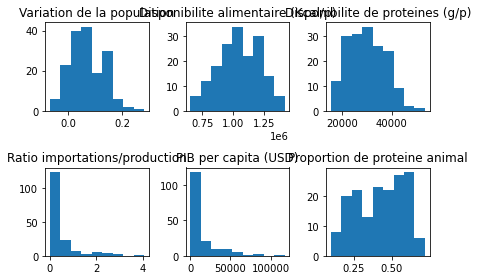

''

In [22]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3)

ax0.hist(data_df['pop_var'], 9, histtype='bar')
ax0.set_title('Variation de la population')

ax1.hist(data_df['disp_alim(Kcal/personne)'], 9, histtype='bar')
ax1.set_title('Disponibilite alimentaire (Kcal/p)')

ax2.hist(data_df['disp_prot(g/personne)'], 9, histtype='bar')
ax2.set_title('Disponibilite de proteines (g/p)')

ax3.hist(data_df['ratio_imp_prod'], 9, histtype='bar')
ax3.set_title('Ratio importations/production')

ax4.hist(data_df['pib_capita'], 9, histtype='bar')
ax4.set_title('PIB per capita (USD)')

ax5.hist(data_df['prot_anim_prop'], 9, histtype='bar')
ax5.set_title('Proportion de proteine animal')

plt.rcParams["figure.figsize"] = (10, 5)
fig.tight_layout()
plt.show()
;

In [23]:
data_pca = data_df[['pop_var', 'disp_alim(Kcal/personne)', 'disp_prot(g/personne)', 'ratio_imp_prod',
                 'pib_capita', 'prot_anim_prop']]
data_pca.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop
0,0.151918,744600.0,20264.80,0.051618,483.885875,0.194344
1,0.076469,1058135.0,30795.05,0.131214,6369.231608,0.427048
2,-0.007249,1226400.0,42245.10,0.052984,5254.384798,0.533523
3,0.107191,1212530.0,33517.95,0.100771,4153.957220,0.269302
4,0.024023,1297210.0,38471.00,0.313374,47684.755233,0.607495


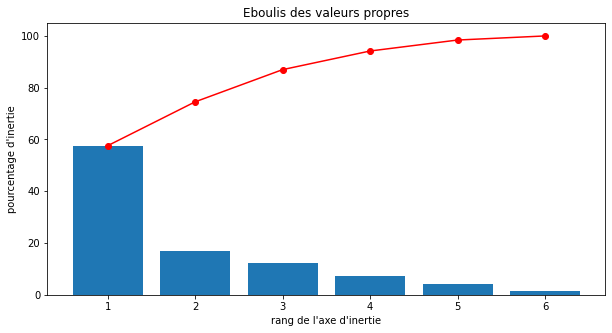

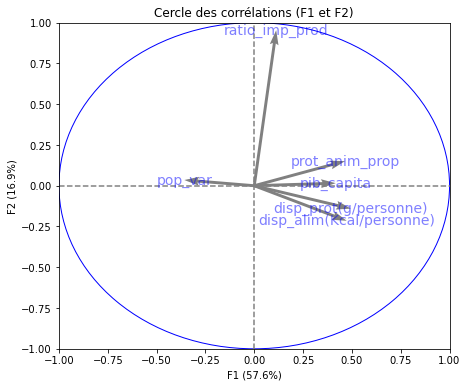

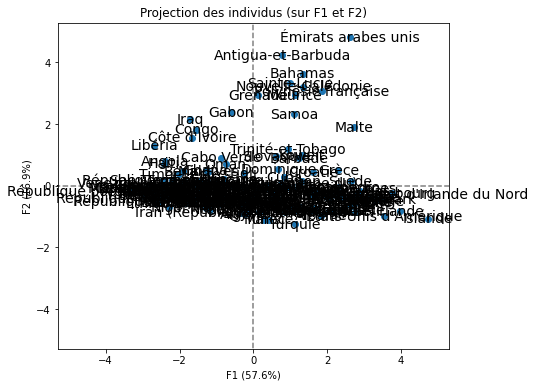

In [24]:
n_comp = 2
X1 = data_pca.values
names = data_df['pays'] # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled1 = std_scale.transform(X1)

# Calcul des composantes principales
pca_eboulis = decomposition.PCA(n_components=6)
pca_eboulis.fit(X_scaled1)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled1)

# Eboulis des valeurs propres
display_scree_plot(pca_eboulis)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected1 = pca.transform(X_scaled1)
display_factorial_planes(X_projected1, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [25]:
cor_matrix = data_pca.corr()
cor_matrix

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop
pop_var,1.000000,-0.494117,-0.502733,-0.087737,-0.275082,-0.585549
disp_alim(Kcal/personne),-0.494117,1.000000,0.893182,0.039140,0.610626,0.611912
disp_prot(g/personne),-0.502733,0.893182,1.000000,0.095071,0.656111,0.704977
ratio_imp_prod,-0.087737,0.039140,0.095071,1.000000,0.144082,0.255615
pib_capita,-0.275082,0.610626,0.656111,0.144082,1.000000,0.636307
prot_anim_prop,-0.585549,0.611912,0.704977,0.255615,0.636307,1.000000


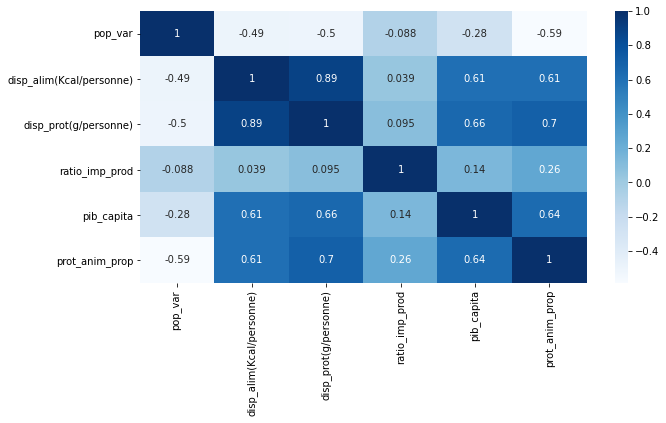

In [26]:
sns.heatmap(cor_matrix, cmap='Blues', annot=cor_matrix);


In [27]:
data_pca2 = data_df[['pop_var', 'disp_alim(Kcal/personne)', 'disp_prot(g/personne)', 'prot_anim_prop']]
data_pca2.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),prot_anim_prop
0,0.151918,744600.0,20264.80,0.194344
1,0.076469,1058135.0,30795.05,0.427048
2,-0.007249,1226400.0,42245.10,0.533523
3,0.107191,1212530.0,33517.95,0.269302
4,0.024023,1297210.0,38471.00,0.607495


In [28]:
data_den = data_df
data_den = data_den.set_index('pays')
data_den.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop
pays,,,,,,
Afghanistan,0.151918,744600.0,20264.80,0.051618,483.885875,0.194344
Afrique du Sud,0.076469,1058135.0,30795.05,0.131214,6369.231608,0.427048
Albanie,-0.007249,1226400.0,42245.10,0.052984,5254.384798,0.533523
Algérie,0.107191,1212530.0,33517.95,0.100771,4153.957220,0.269302
Allemagne,0.024023,1297210.0,38471.00,0.313374,47684.755233,0.607495


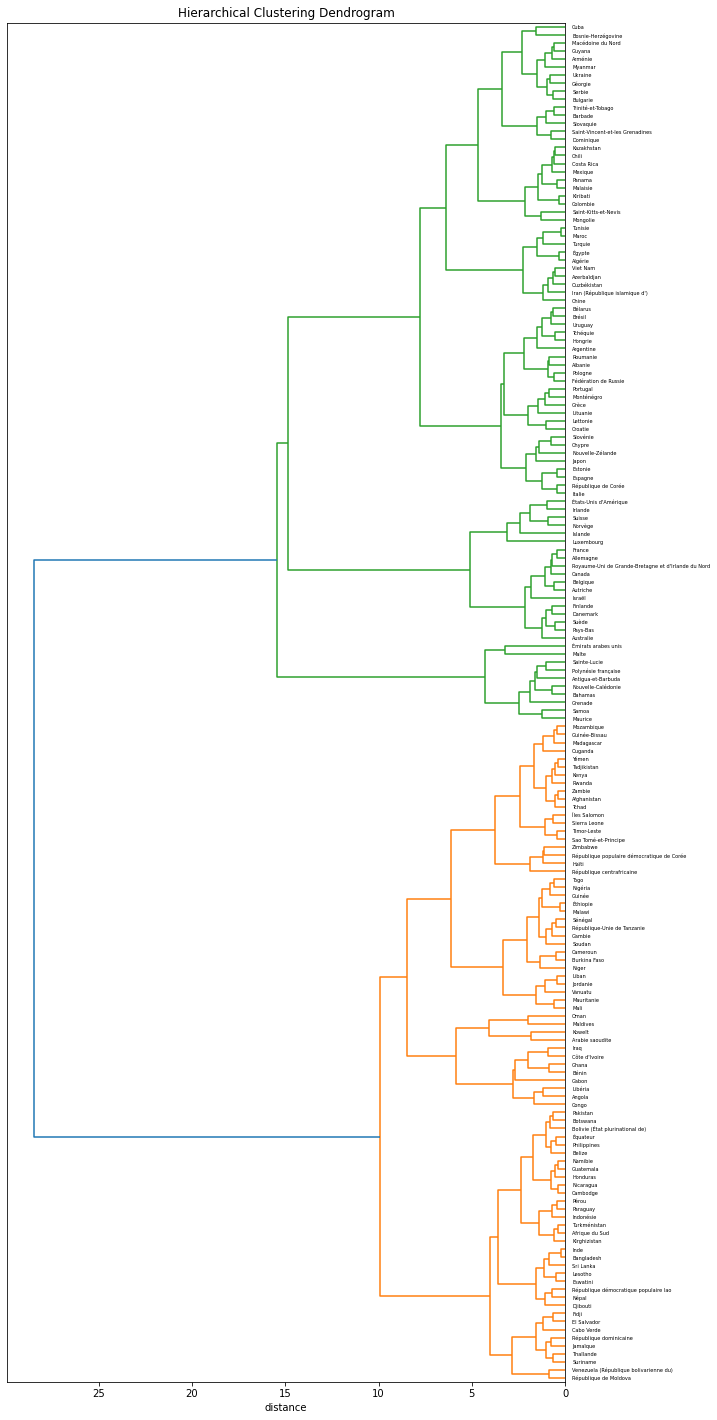

<Figure size 720x360 with 0 Axes>

In [29]:
# préparation des données pour le clustering
X_den = data_den.values
names = data_den.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X_den)
X_scaled_den = std_scale.transform(X_den)
# Clustering hiérarchique
Z = linkage(X_scaled_den, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)
plt.savefig('Dendrogram.png')

In [30]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

print(clusters)

[2 1 5 5 4 2 3 2 5 5 4 4 5 3 1 5 4 1 1 5 1 5 5 2 5 2 1 1 2 4 5 5 5 5 2 5 5
 5 2 4 1 5 1 5 5 1 1 4 4 5 2 2 2 3 5 1 2 2 5 5 2 1 5 1 1 5 2 4 4 4 5 1 5 2
 5 2 1 5 2 1 5 2 2 5 4 5 2 5 2 2 2 3 5 3 2 5 5 5 2 5 1 1 2 2 4 3 5 1 2 2 5
 1 5 1 4 1 5 3 5 1 5 4 2 2 5 1 1 1 2 2 5 5 3 3 2 5 2 5 5 2 1 4 1 4 2 2 2 5
 1 2 2 5 5 1 5 5 5 2 1 5 2 2 2 5 3 1 4 2 2]


In [31]:
data_den['cluster'] = clusters
data_den.to_csv("data_cluster.csv", index = False)
data_den.head() 

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Afghanistan,0.151918,744600.0,20264.80,0.051618,483.885875,0.194344,2
Afrique du Sud,0.076469,1058135.0,30795.05,0.131214,6369.231608,0.427048,1
Albanie,-0.007249,1226400.0,42245.10,0.052984,5254.384798,0.533523,5
Algérie,0.107191,1212530.0,33517.95,0.100771,4153.957220,0.269302,5
Allemagne,0.024023,1297210.0,38471.00,0.313374,47684.755233,0.607495,4


In [32]:
Xproj = pd.DataFrame(X_projected1)
Xproj = Xproj.set_index(data_df['pays'])
Xproj['cluster'] = clusters
Xproj = Xproj.rename(columns={0:'F1', 1:'F2'})
Xproj.head()

,F1,F2,cluster
pays,,,
Afghanistan,-3.003546,-0.175084,2
Afrique du Sud,-0.154835,-0.479857,1
Albanie,1.842036,-0.970567,5
Algérie,-0.229707,-0.909819,5
Allemagne,2.771613,-0.497267,4


In [33]:
centroids = pd.pivot_table(Xproj, index=['cluster'],
                         values=['F1', 'F2'], 
                         aggfunc='mean')
centroids.to_csv("centroids.csv", index = False)
centroids.head(10)

,F1,F2
cluster,,
1,-0.945369,-0.214237
2,-2.040256,0.139642
3,1.401522,3.238426
4,3.089156,-0.526575
5,1.024658,-0.378384


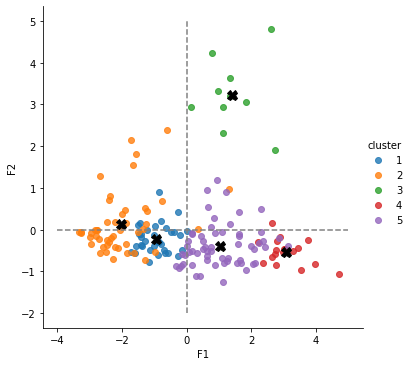

In [60]:
g = sns.lmplot(x="F1", y="F2", hue="cluster", data=Xproj, fit_reg=False)
plt.plot(centroids['F1'], centroids['F2'], marker='X', markersize=10, linewidth=0, markerfacecolor='k', markeredgecolor='k')
plt.plot([-4, 5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-2, 5], color='grey', ls='--');

In [35]:
cluster1 = data_den[data_den['cluster'] == 1]
cluster1.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Afrique du Sud,0.076469,1058135.0,30795.05,0.131214,6369.231608,0.427048,1
Bangladesh,0.056397,935495.0,22166.45,0.029594,1670.796355,0.206817,1
Belize,0.108054,1012875.0,26254.45,0.117509,4884.742421,0.428472,1
Bolivie (État plurinational de),0.076905,880380.0,26732.60,0.017630,3548.590155,0.484162,1
Botswana,0.092856,854830.0,24049.85,0.184770,8279.835077,0.425254,1


In [36]:
cluster1.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.062573,9.602184e+05,25142.058824,0.202799,4262.440873,0.364341,1.0
std,0.033029,6.792676e+04,2761.016052,0.216308,2176.709242,0.088103,0.0
min,-0.030016,7.738000e+05,19772.050000,0.000430,995.096981,0.191014,1.0
25%,0.044221,9.133212e+05,23141.912500,0.033199,2521.603455,0.294044,1.0
50%,0.067478,9.794775e+05,24274.325000,0.155036,4110.015327,0.389050,1.0
75%,0.087149,1.012328e+06,26613.062500,0.265214,6204.014361,0.426599,1.0
max,0.109628,1.058135e+06,32346.300000,0.962933,8279.835077,0.504901,1.0


In [37]:
cluster2 = data_den[data_den['cluster'] == 2]
cluster2.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Afghanistan,0.151918,744600.0,20264.80,0.051618,483.885875,0.194344,2
Angola,0.184273,870525.0,19363.25,0.745918,3289.643374,0.307446,2
Arabie saoudite,0.121479,1207055.0,31733.10,0.631219,23337.018242,0.376582,2
Burkina Faso,0.156898,999005.0,29258.40,0.169614,813.099750,0.142340,2
Bénin,0.147977,1005575.0,23349.05,0.776598,1241.824418,0.194622,2


In [38]:
cluster2.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.0
mean,0.144294,8.938242e+05,22825.579167,0.395207,3313.541332,0.264675,2.0
std,0.041958,1.334251e+05,4952.371524,0.504455,6209.302594,0.111676,0.0
min,0.024874,6.518900e+05,15479.650000,0.001060,395.763936,0.098749,2.0
25%,0.132251,7.900425e+05,19718.212500,0.050621,734.693895,0.193565,2.0
50%,0.143226,8.772775e+05,21837.950000,0.163987,1193.602116,0.236109,2.0
75%,0.160317,9.972712e+05,25245.225000,0.539634,2229.696213,0.304901,2.0
max,0.282795,1.266915e+06,37671.650000,1.961108,33999.242958,0.603887,2.0


In [39]:
cluster3 = data_den[data_den['cluster'] == 3]
cluster3.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Antigua-et-Barbuda,0.052122,892425.0,29269.35,3.126214,16672.744240,0.645218,3
Bahamas,0.050298,969075.0,29451.85,2.761820,33767.766060,0.649399,3
Grenade,0.030360,876730.0,26031.80,2.219031,10485.906044,0.566601,3
Malte,0.030733,1248300.0,42486.00,2.036091,33345.951704,0.567612,3
Maurice,0.009346,1113615.0,32459.45,2.593111,11191.564625,0.463398,3


In [63]:
cluster3.index


Index(['Antigua-et-Barbuda', 'Bahamas', 'Grenade', 'Malte', 'Maurice',
       'Nouvelle-Calédonie', 'Polynésie française', 'Sainte-Lucie', 'Samoa',
       'Émirats arabes unis'],
      dtype='object', name='pays')

In [40]:
cluster3.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.035976,1.046455e+06,32937.600000,2.657622,22348.428184,0.580205,3.0
std,0.015560,1.259065e+05,5060.368097,0.594429,13558.893526,0.071912,0.0
min,0.009346,8.767300e+05,26031.800000,2.036091,4249.999227,0.457646,3.0
25%,0.027488,9.589462e+05,29814.112500,2.295446,11233.144347,0.566854,3.0
50%,0.030546,1.046638e+06,31694.775000,2.588222,19455.505905,0.583978,3.0
75%,0.049494,1.111699e+06,34471.512500,2.720688,33662.312471,0.639850,3.0
max,0.059608,1.248300e+06,42486.000000,4.068401,43839.356349,0.660469,3.0


In [41]:
cluster4 = data_den[data_den['cluster'] == 4]
cluster4.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Allemagne,0.024023,1297210.0,38471.00,0.313374,47684.755233,0.607495,4
Australie,0.070662,1237715.0,38668.10,0.135155,58596.826341,0.667359,4
Autriche,0.039176,1348675.0,39828.80,0.349900,51183.781644,0.603281,4
Belgique,0.029422,1375685.0,36452.55,0.528101,47354.636623,0.586563,4
Canada,0.050374,1301590.0,38003.80,0.134745,46444.396642,0.545044,4


In [42]:
cluster4.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
count,18.000000,1.800000e+01,18.000000,18.000000,18.000000,18.000000,18.0
mean,0.041986,1.279224e+06,40674.788889,0.281421,61412.799593,0.621629,4.0
std,0.025910,6.972886e+04,4163.106514,0.155946,19886.979604,0.043003,0.0
min,0.012827,1.162160e+06,34846.550000,0.052448,41491.611058,0.545044,4.0
25%,0.025296,1.225761e+06,38485.600000,0.160786,47437.166275,0.596210,4.0
50%,0.035286,1.271478e+06,39584.250000,0.283043,54641.533523,0.616709,4.0
75%,0.050763,1.325680e+06,42429.425000,0.386118,73082.001058,0.644506,4.0
max,0.113692,1.418025e+06,53337.450000,0.617221,117369.540527,0.718401,4.0


In [43]:
cluster5 = data_den[data_den['cluster'] == 5]
cluster5.head()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
pays,,,,,,,
Albanie,-0.007249,1226400.0,42245.10,0.052984,5254.384798,0.533523,5
Algérie,0.107191,1212530.0,33517.95,0.100771,4153.957220,0.269302,5
Argentine,0.051311,1207055.0,38971.05,0.009782,11719.075678,0.646717,5
Arménie,0.018690,1093905.0,34437.75,0.094087,4220.534194,0.480551,5
Azerbaïdjan,0.060100,1149385.0,34463.30,0.069917,4735.142880,0.344524,5


In [44]:
cluster5.describe()

,pop_var,disp_alim(Kcal/personne),disp_prot(g/personne),ratio_imp_prod,pib_capita,prot_anim_prop,cluster
count,59.000000,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.0
mean,0.024153,1.149602e+06,34167.959322,0.295312,13087.197982,0.503295,5.0
std,0.042542,9.176854e+04,4310.657529,0.306721,9896.049796,0.103135,0.0
min,-0.069018,9.413350e+05,25758.050000,0.001580,1370.685748,0.269302,5.0
25%,-0.005631,1.092810e+06,31422.850000,0.060551,5855.061809,0.437700,5.0
50%,0.016406,1.152305e+06,33459.550000,0.184887,9789.504209,0.531724,5.0
75%,0.057999,1.212530e+06,36952.600000,0.424109,17796.135791,0.564839,5.0
max,0.113331,1.354515e+06,46227.250000,1.288411,43836.152525,0.651128,5.0


In [45]:
pv = stats.shapiro(data_df['pop_var'])
if pv.pvalue<0.05:
    print('Les données pop_var ne proviennent pas d\'une distribution normale (p-value={})'.format(round(pv.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données pop_var proviennent d\'une distribution normale (p-value={})'.format(round(pv.pvalue,3)))
print('------------------')
da = stats.shapiro(data_df['disp_alim(Kcal/personne)'])
if da.pvalue<0.05:
    print('Les données disp_alim(Kcal/personne) ne proviennent pas d\'une distribution normale (p-value={})'.format(round(da.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données disp_alim(Kcal/personne) proviennent d\'une distribution normale (p-value={})'.format(round(da.pvalue,3)))
print('------------------')
pr = stats.shapiro(data_df['disp_prot(g/personne)'])
if pr.pvalue<0.05:
    print('Les données disp_prot(g/personne) ne proviennent pas d\'une distribution normale (p-value={})'.format(round(pr.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données disp_prot(g/personne) proviennent d\'une distribution normale (p-value={})'.format(round(pr.pvalue,3)))
print('------------------')
pa = stats.shapiro(data_df['prot_anim_prop'])
if pa.pvalue<0.05:
    print('Les données prot_anim_prop ne proviennent pas d\'une distribution normale (p-value={})'.format(round(pa.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données prot_anim_prop proviennent d\'une distribution normale (p-value={})'.format(round(pa.pvalue,3)))
print('------------------')
ip = stats.shapiro(data_df['ratio_imp_prod'])
if ip.pvalue<0.05:
    print('Les données ratio_imp_prod ne proviennent pas d\'une distribution normale (p-value={})'.format(round(ip.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données ratio_imp_prod proviennent d\'une distribution normale (p-value={})'.format(round(ip.pvalue,3)))
print('------------------')
pc = stats.shapiro(data_df['pib_capita'])
if pc.pvalue<0.05:
    print('Les données pib_capita ne proviennent pas d\'une distribution normale (p-value={})'.format(round(pc.pvalue,3)))
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse que les données pib_capita proviennent d\'une distribution normale (p-value={})'.format(round(pc.pvalue,3)))

Les données pop_var ne proviennent pas d'une distribution normale (p-value=0.008)
------------------
Il n'est pas possible de rejeter l'hypothèse que les données disp_alim(Kcal/personne) proviennent d'une distribution normale (p-value=0.099)
------------------
Les données disp_prot(g/personne) ne proviennent pas d'une distribution normale (p-value=0.026)
------------------
Les données prot_anim_prop ne proviennent pas d'une distribution normale (p-value=0.0)
------------------
Les données ratio_imp_prod ne proviennent pas d'une distribution normale (p-value=0.0)
------------------
Les données pib_capita ne proviennent pas d'une distribution normale (p-value=0.0)


In [46]:
dif_sig235 = stats.levene(cluster3['disp_alim(Kcal/personne)'], 
                          cluster2['disp_alim(Kcal/personne)'],
                          cluster5['disp_alim(Kcal/personne)'])

if dif_sig235.pvalue<0.05:
    print('Les variances ne sont pas égaux')
else:
    print('Il n\'est pas possible de rejeter l\'hypothèse null que les variances son égaux')

Les variances ne sont pas égaux


In [47]:
stats.levene(cluster2['disp_alim(Kcal/personne)'], cluster3['disp_alim(Kcal/personne)'], cluster5['disp_alim(Kcal/personne)'])

LeveneResult(statistic=3.285923945559229, pvalue=0.04097880202044641)

In [48]:
stats.ttest_ind(cluster3['disp_alim(Kcal/personne)'], cluster5['disp_alim(Kcal/personne)'], equal_var=False)

Ttest_indResult(statistic=-2.4813334201203103, pvalue=0.031086927324473025)

In [49]:
stats.ttest_ind(cluster3['disp_alim(Kcal/personne)'], cluster2['disp_alim(Kcal/personne)'], equal_var=False)

Ttest_indResult(statistic=3.4509923774374047, pvalue=0.004063713538802311)